In [11]:
#Imports
import xarray as xr
import numpy as np
import pandas as pd
from collections import OrderedDict
import csv
import math as ma
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
#from cartopy import config
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import warnings
from tqdm import tqdm

In [49]:
#Verbose?
verbose='false'

#Choose ERA5 or NCEP2. This switch also selects the eval/???? subfolders, so do not mix and match as this 
#would lead to incorrect results.
reanalysis='ERA5'

#Define paths
obs_path='obs/'
model_path='/home/awiiccp2/software/cmpi-tool/input/'
out_path='output/'
eval_path='eval/'+reanalysis+'/'
time = '198912-201411'


#Define the name and evaluated variables for your model run


cmip6 = {
    'ACCESS-CM2':   [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM1-MR':   [           'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'BCC-SM2-MR':   [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'CAMS':         [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'CanESM5':      [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'CAS-ESM2-0':   [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos',                         ],
    'CESM2':        [ 'siconc', 'tas', 'clt', 'pr', 'rlut',               'ua', 'zg', 'zos', 'tos', 'mlotst'                ],
    'CIESM':        [           'tas', 'clt', 'pr', 'rlut',               'ua', 'zg', 'zos', 'tos',           'thetao', 'so'],
    'CMCC-CM2-SR5': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'CNRM-CM6-1-HR':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst'                ],
    'E3SM-1-1':     [ 'siconc', 'tas', 'clt', 'pr', 'rlut',               'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'EC-Earth3':    [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'FGOALS-f3-L':  [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'FIO-ESM-2-0':  [ 'siconc', 'tas', 'clt', 'pr', 'rlut',               'ua', 'zg', 'zos', 'tos',           'thetao', 'so'],
    'GISS-E2-1-G':  [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'HadGEM3MM':    [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'ICON-ESM-LR':  [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'IITM-ESM':     [           'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg',        'tos',                         ],
    'INM5':         [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg',                         'thetao', 'so'],
    'IPSL-CM6A-LR': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'KIOST-ESM':    [ 'siconc', 'tas', 'clt',       'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst',               ],
    'MCMUA1':       [           'tas',        'pr', 'rlut', 'uas', 'vas', 'ua', 'zg',        'tos',           'thetao', 'so'],
    'MIROC6':       [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos',                         ],
    'MPI-ESM1-2-HR':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'MRI-ESM2-0':   [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas',             'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'NESM3':        [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],   
    'NOAA-GFDL':    [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos',           'thetao', 'so'],
    'NorESM2-MM':   [ 'siconc', 'tas', 'clt', 'pr', 'rlut',               'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'SNU':          [ 'siconc', 'tas', 'clt', 'pr', 'rlut',               'ua', 'zg', 'zos', 'tos',           'thetao', 'so'],
    'TaiESM1':      [ 'siconc', 'tas', 'clt', 'pr', 'rlut',               'ua', 'zg', 'zos', 'tos',           'thetao', 'so'],
}

awi_cm3_lr= {
    'AWI-CM3-LR':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst'],
}

awi_esm1= {
    'AWI-ESM-1-1-LR':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
}




awi_cm3_ref= {
    'AWI-CM3-REF':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so']
}

awi_cm3_1= {
    'AWI-CM3-REF':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3-EOF':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3-PRHEAT':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3-SSI':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3-PSNOW':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3-NOHEM':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3-OCURRF':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3-REFAC4':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst'],
    'AWI-CM3-SNOWCON':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],

}

awi_cm3_1_base= {
    'AWI-CM3.1-BASE':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so']
}

awi_cm3_1_tuning= {
    'AWI-CM3-REF':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    #'AWI-CM3.1-BASE+GMRAMP': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    #'AWI-CM3.1-BASE+GM2K': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    #'AWI-CM3.1-BASE+GM4K': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    #'AWI-CM3.1-BASE+RPRCON': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3.1-BASE': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    #'AWI-CM3.1-BASE+DALBSEAD+2400S': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    #'AWI-CM3.1-BASE+DALBSEAD+HOURLY': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3.1-BASE+SPP': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3.1-BASE+REFAC+SPP': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],
    'AWI-CM3.1-BASE+REFAC+SPP+LINFS': [ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst', 'thetao', 'so'],

}

awi_cm3_1_dart= {
    'AWI-CM3-DART':[ 'siconc', 'tas', 'clt', 'pr', 'rlut', 'uas', 'vas', 'ua', 'zg', 'zos', 'tos', 'mlotst']
}


models = awi_cm3_1_dart

eval_models = cmip6

#Select for each variable which vertical levels shall be taken into account
var_depths ={    
        'siconc':['surface'],
        'tas':['surface'],
        'clt':['surface'],
        'pr':['surface'],
        'rlut':['surface'],
        'uas':['surface'],
        'vas':['surface'],
        'ua':['300hPa'],
        'zg':['500hPa'],
        'zos':['surface'],
        'tos':['surface'],
        'mlotst':['surface'],
        'thetao':['10m','100m','1000m'],
        'so':['10m','100m','1000m'],
}


#Define which observational dataset biases are computed against for each variable
obs = { 
    'siconc':'OSISAF',
    'tas':reanalysis,
    'clt':'MODIS',
    'pr':'GPCP',
    'rlut':'CERES',
    'uas':reanalysis,
    'vas':reanalysis,
    'ua':reanalysis,
    'zg':reanalysis,
    'zos':'NESDIS',
    'tos':'HadISST2',
    'mlotst':'C-GLORSv7',
    #'thetao':'EN4',
    #'so':'EN4',
}




In [50]:
#Select seasons
seasons = ['MAM', 'JJA', 'SON', 'DJF']

#Define regions
regions={
    #'glob' : {
    #'lat_min':-90,
    #'lat_max':90,
    #'lon_min':0,
    #'lon_max':360,
    #'plot_color':'none',},
         
    'arctic' : {
    'lat_min':60,
    'lat_max':90,
    'lon_min':0,
    'lon_max':360,
    'plot_color':'red',},
         
    'northmid' : {
    'lat_min':30,
    'lat_max':60,
    'lon_min':0,
    'lon_max':360,
    'plot_color':'lightgrey',},
         
    'tropics' : {
    'lat_min':-30,
    'lat_max':30,
    'lon_min':0,
    'lon_max':360,
    'plot_color':'green',},
         
    #'innertropics' : {
    #'lat_min':-15,
    #'lat_max':15,
    #'lon_min':0,
    #'lon_max':360,
    #'plot_color':'green',},
        
    'nino34' : {
    'lat_min':-5,
    'lat_max':5,
    'lon_min':190,
    'lon_max':240,
    'plot_color':'yellow',},
         
    'southmid' : {
    'lat_min':-60,
    'lat_max':-30,
    'lon_min':0,
    'lon_max':360,
    'plot_color':'pink',},
         
    'antarctic' : {
    'lat_min':-90,
    'lat_max':-60,
    'lon_min':0,
    'lon_max':360,
    'plot_color':'blue',},
          
}

# This stores all regions for which the evaluation data has been generated
all_regions=[ 'glob', 'arctic', 'northmid', 'tropics', 'innertropics', 'nino34', 'southmid', 'antarctic']


In [51]:
# Visulatize regions

if verbose == 'true':
    projection = ccrs.PlateCarree()

    # Plot the leading EOF expressed as correlation in the Pacific domain.
    plt.figure(figsize=(12,9))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeature.LAND, color='lightgrey')
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title('Regions', fontsize=13,fontweight="bold")

    ax.set_extent([0, -1, 90, -90])
    for region in regions:
        if region == 'glob':
            continue 
        else:
            lon_min=regions[region]['lon_min']
            lon_max=regions[region]['lon_max']
            lat_min=regions[region]['lat_min']
            lat_max=regions[region]['lat_max']
            ax.add_patch(mpatches.Rectangle(xy=[lon_min-1, lat_min], width=lon_max-lon_min, height=lat_max-lat_min,
                                            facecolor=regions[region]['plot_color'],
                                            alpha=0.5,
                                            edgecolor=regions[region]['plot_color'],
                                            lw='2',
                                            transform=ccrs.PlateCarree())
                         )
            plt.text(lon_min-177,lat_max-7,region,weight='bold')

    ax.tick_params(labelsize=13)


In [52]:
print('Loading obs data')

ds_obs = OrderedDict()

for var,depths in zip(obs,var_depths):
    for depth in np.arange(0,len(var_depths[depths])):
        for seas in seasons:
            if verbose == 'true':
                print('loading '+obs_path+var+'_'+obs[var]+'_'+var_depths[depths][depth]+'_'+seas+'.nc')

            intermediate = xr.open_dataset(obs_path+var+'_'+obs[var]+'_'+var_depths[depths][depth]+'_'+seas+'.nc')
            ds_obs[var,var_depths[depths][depth],seas] = intermediate.compute()
            try:
                ds_obs[var,var_depths[var][depth],seas]=ds_obs[var,var_depths[var][depth],seas].drop('time_bnds')
            except:
                pass
            try:
                ds_obs[var,var_depths[var][depth],seas]=ds_obs[var,var_depths[var][depth],seas].drop('time_bnds_2')
            except:
                pass
            try:
                ds_obs[var,var_depths[var][depth],seas]=ds_obs[var,var_depths[var][depth],seas].drop('depth')
            except:
                pass
            

Loading obs data


In [53]:
print('Loading model data')

ds_model = OrderedDict()

for model in tqdm(models):
    for var in models[model]:
        for depth in np.arange(0,len(var_depths[var])):
            for seas in seasons:
                if verbose == 'true':
                    print('loading '+model_path+var+'_'+model+'_'+time+'_'+var_depths[var][depth]+'_'+seas+'.nc')
                intermediate = xr.open_mfdataset(model_path+var+'_'+model+'_'+time+'_'+var_depths[var][depth]+'_'+seas+'.nc')
                intermediate = intermediate.squeeze(drop=True)
                ds_model[var,var_depths[var][depth],seas,model] = intermediate.compute()
                try:
                    ds_model[var,var_depths[var][depth],seas,model]=ds_model[var,var_depths[var][depth],seas,model].drop('time_bnds')
                except:
                    pass
                try:
                    ds_model[var,var_depths[var][depth],seas,model]=ds_model[var,var_depths[var][depth],seas,model].drop('depth')
                except:
                    pass


Loading model data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]


In [54]:
print('Calculating absolute error and field mean of abs error')

# Returns equvalent to cdo fldmean ()
def fldmean(ds):
    weights = np.cos(np.deg2rad(ds.lat))
    weights.name = "weights"
    ds_weighted = ds.weighted(weights)
    return ds.mean(("lon", "lat"))


abs_error = OrderedDict()
mean_error = OrderedDict()

for model in tqdm(models):
    for var in models[model]:
        for depth in np.arange(0,len(var_depths[var])):
            for region in regions:
                filter1 = ds_model[var,var_depths[var][depth],seas,model].lat>regions[region]['lat_min']
                filter2 = ds_model[var,var_depths[var][depth],seas,model].lat<regions[region]['lat_max']
                filter3 = ds_model[var,var_depths[var][depth],seas,model].lon>regions[region]['lon_min']
                filter4 = ds_model[var,var_depths[var][depth],seas,model].lon<regions[region]['lon_max']

                for seas in seasons:
                    abs_error[var,var_depths[var][depth],seas,model,region]=np.sqrt((ds_model[var,var_depths[var][depth],seas,model].where(filter1 & filter2 & filter3 & filter4)-
                                                       ds_obs[var,var_depths[var][depth],seas]).where(filter1 & filter2 & filter3 & filter4)*
                                                      (ds_model[var,var_depths[var][depth],seas,model].where(filter1 & filter2 & filter3 & filter4)-
                                                       ds_obs[var,var_depths[var][depth],seas].where(filter1 & filter2 & filter3 & filter4)))
                    mean_error[var,var_depths[var][depth],seas,model,region] = fldmean(abs_error[var,var_depths[var][depth],seas,model,region])


Calculating absolute error and field mean of abs error


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]


In [55]:
print('Writing field mean of errors into csv files')

for model in tqdm(models):
    with open(out_path+'abs/'+model+'.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=' ',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(['Variable','Region','Level','Season','AbsMeanError'])
        for var in models[model]:
            for region in regions:
                for depth in np.arange(0,len(var_depths[var])):
                    for seas in seasons:
                        writer.writerow([var,region,var_depths[var][depth],seas,np.squeeze(mean_error[var,var_depths[var][depth],seas,model,region].to_array(var).values[0])])

Writing field mean of errors into csv files


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


In [56]:
print('Reading precalculated cmip6 field mean of errors from csv files')

max_depth=0
for var in var_depths:
    if len(var_depths[var]) > max_depth:
        max_depth = len(var_depths[var])

collect = np.empty([len(eval_models),len(obs),len(regions),max_depth,len(seasons)])*np.nan
i=0
for eval_model in tqdm(eval_models):
    df = pd.read_csv(eval_path+eval_model+'.csv', delimiter=' ')
    values = df['AbsMeanError']
    regions_csv = df['Region']
    var_csv = df['Variable']
    j=0
    r=0
    for var in obs:
        k=0
        a=(df['Variable']==var).to_list()
        if verbose == 'true':
            if any(a): # Check if variable appears in list. If not, skip it.
                print('reading: ',eval_model,var)
            else:
                print('filling: ',eval_model,var)
        for region in regions:
            l=0
            for depth in np.arange(0,len(var_depths[var])):
                m=0
                for seas in seasons:
                    if any(a): # Check if variable appears in csv. If not, skip it.
                        if regions_csv[r] not in regions: # Check if region from csv part of the analysis. Else advance
                            while True:
                                r+=1
                                if regions_csv[r] in regions:
                                    break
                        collect[i,j,k,l,m]=values[r]
                        r+=1
                    m+=1
                l+=1
            k+=1
        j+=1
    i+=1
# Ignoring non useful warning:
# /tmp/ipykernel_19478/363568120.py:37: RuntimeWarning: Mean of empty slice
#  ensmean=np.nanmean(collect,axis=0)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    ensmean=np.nanmean(collect,axis=0)


Reading precalculated cmip6 field mean of errors from csv files


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 58.36it/s]


In [57]:
print('Placing sums of error into easier to inspect dictionary')

eval_error_mean = OrderedDict()

j=0
for var in tqdm(obs):
    k=0
    for region in regions:
        l=0
        for depth in np.arange(0,len(var_depths[var])):
            m=0
            for seas in seasons:
                eval_error_mean[var,region,var_depths[var][depth],seas]=ensmean[j,k,l,m]
                m+=1
            l+=1
        k+=1
    j+=1

Placing sums of error into easier to inspect dictionary


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 10596.14it/s]


In [58]:
print('Calculating ratio of current model error to evaluation model error')

error_fraction = OrderedDict()

sum=0
for model in tqdm(models):
    for var in models[model]:
        for region in regions:
            for depth in np.arange(0,len(var_depths[var])):
                for seas in seasons:
                    error_fraction[var,var_depths[var][depth],seas,model,region] = mean_error[var,var_depths[var][depth],seas,model,region] / eval_error_mean[var,region,var_depths[var][depth],seas]


Calculating ratio of current model error to evaluation model error


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 42.45it/s]


In [59]:
print('Writing ratio of field mean of errors into csv files and sum up error fractions for cmpi score')

cmpi = OrderedDict()

for model in tqdm(models):
    sum=0
    iter=0
    with open(out_path+'frac/'+model+'_fraction.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=' ',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(['Variable','Region','Level','Season','FracMeanError'])
        for var in models[model]:
            for depth in np.arange(0,len(var_depths[var])):
                for region in regions:
                    for seas in seasons:
                        writer.writerow([var,region,var_depths[var][depth],seas,np.squeeze(error_fraction[var,var_depths[var][depth],seas,model,region].to_array(var).values[0])])
                        if ma.isnan(np.squeeze(error_fraction[var,var_depths[var][depth],seas,model,region].to_array(var).values[0])):
                            pass
                        else:
                            sum+=np.squeeze(error_fraction[var,var_depths[var][depth],seas,model,region].to_array(var).values[0])
                            iter+=1
        cmpi[model]=np.squeeze(sum)/iter
        writer.writerow(['CMPI','global','yearly',cmpi[model]])

Writing ratio of field mean of errors into csv files and sum up error fractions for cmpi score


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.83it/s]


Reading precalculated evaluation field means of errors from csv files and plotting heatmap(s)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.72s/it]


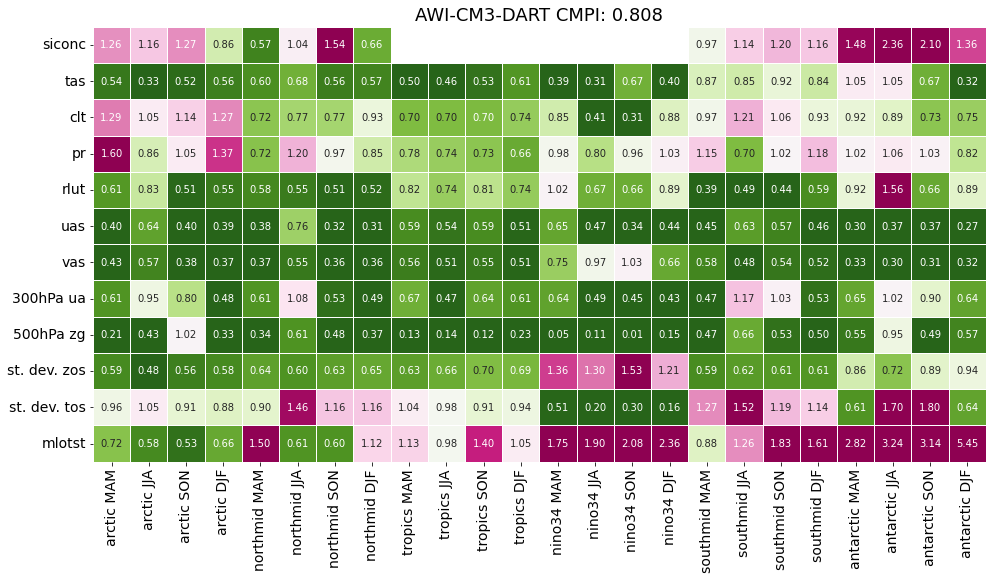

In [60]:
print('Reading precalculated evaluation field means of errors from csv files and plotting heatmap(s)')

max_depth=0
for var in var_depths:
    if len(var_depths[var]) > max_depth:
        max_depth = len(var_depths[var])

plt.rcParams.update({'figure.max_open_warning': 0})
collect_frac_non = OrderedDict()
for model in tqdm(models):
    df = pd.read_csv(out_path+'frac/'+model+'_fraction.csv', delimiter=' ')
    values = df['FracMeanError'] #you can also use df['column_name']
    r=0
    for var in obs:
        a=(df['Variable']==var).to_list()
        if verbose == 'true':
            if any(a): # Check if variable appears in list. If not, skip it.
                print('reading: ',model,var)
            else:
                print('filling: ',model,var)
        for depth in np.arange(0,len(var_depths[var])):
            for region in regions:
                for seas in seasons:
                    if any(a):
                        collect_frac_non[var+' '+region,var_depths[var][depth]+' '+seas]=values[r]
                        r+=1
                    else:
                        collect_frac_non[var+' '+region,var_depths[var][depth]+' '+seas]=np.nan


    seasons_plot = [' MAM', ' JJA', ' SON', ' DJF'] #adding spaces in front
    a=seasons_plot*len(regions)
    b=np.repeat(list(regions.keys()),len(seasons_plot))
    coord=[n+str(m) for m,n in zip(a,b)]
    
    index_obs=[]
    for var in obs:
        for depth in np.arange(0,len(var_depths[var])):
            if var_depths[var][depth] == 'surface':
                levelname=''
            else:
                levelname=var_depths[var][depth]+' '
            if var == 'zos' or var == 'tos':
                levelname='st. dev. '
            index_obs.append(levelname+var)
    if verbose == 'true':
        print(model,'number of values: ',len(list(collect_frac_non.values())),'; shape:',len(index_obs),'x',len(regions)*len(seasons))
    collect_frac_reshaped = np.array(list(collect_frac_non.values()) ).reshape(len(index_obs),len(regions)*len(seasons)) # transform to 2D
    collect_frac_dataframe = pd.DataFrame(data=collect_frac_reshaped, index=index_obs, columns=coord)

    fig, ax = plt.subplots(figsize=((len(regions)*len(seasons))/1.5,len(index_obs)/1.5))
    fig.patch.set_facecolor('white')
    plt.rcParams['axes.facecolor'] = 'white'
    ax = sns.heatmap(collect_frac_dataframe, vmin=0.5, vmax=1.5,center=1,annot=True,fmt='.2f',cmap="PiYG_r",cbar=False,linewidths=1)
    plt.xticks(rotation=90,fontsize=14)
    plt.yticks(rotation=0, ha='right',fontsize=14)
    plt.title(model+' CMPI: '+str(round(cmpi[model],3)), fontsize=18)
    
    plt.savefig(out_path+'plot/'+model+'.png',dpi=300,bbox_inches='tight')
    i+=1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.50s/it]


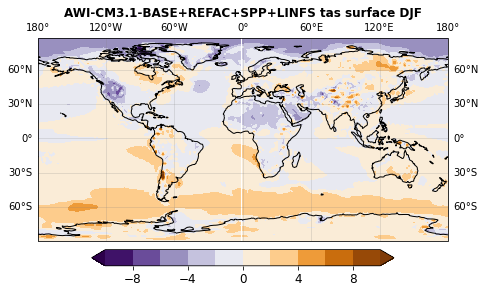

In [15]:
# Debug plot script


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import math

for model in tqdm(models):
    for seas in seasons:
        depth=0
        levels=np.linspace(-10,10,11)
        #levels=np.linspace(-0,2000,11)
        var='tas'

        %matplotlib inline

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4.5))
        ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE,zorder=3)


        data = ds_model[var,var_depths[var][depth],seas,model].to_array(var).values[0]
        obsp = np.squeeze(ds_obs[var,var_depths[var][depth],seas].to_array(var).values[0])
        data_to_plot = data[0:90,:]-obsp[0:90,:]
        #data_to_plot = obsp[0:90,:]

        lon = np.arange(0, 360, 2)
        lat = np.arange(-90, 90, 2)

        imf=plt.contourf(lon, lat, data_to_plot, cmap=plt.cm.PuOr_r,levels=levels, extend='both', transform=ccrs.PlateCarree())

        ax.set_title(model+' '+var+' '+var_depths[var][depth]+' '+seas,fontweight="bold")
        plt.tight_layout() 
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='-')

        gl.xlabels_bottom = False    
        cbar_ax_abs = fig.add_axes([0.15, 0.11, 0.7, 0.05])
        cbar_ax_abs.tick_params(labelsize=12)
        cb = fig.colorbar(imf, cax=cbar_ax_abs, orientation='horizontal')
        cb.ax.tick_params(labelsize='12')
        plt.savefig(out_path+'plot/maps/'+model+'_'+var+'_'+seas+'.png',dpi=200,bbox_inches='tight')
